In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [54]:
df = pd.read_csv('Modeling.csv')
features = ['Month_sin', 'Month_cos', 'Year','Month','Day',
            'Sunspot_lag1', 'Sunspot_lag12', 'Sunspot_lag132','Diff_11Year','Diff_1Year']
X = df[features]
y = df['Monthly Mean Total Sunspot Number']

In [55]:
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [56]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [57]:
y_pred = model.predict(X_test)

In [58]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [59]:


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("🔹 Random Forest")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


🔹 Random Forest
R² Score: 0.9982
MSE: 9.40
MAE: 1.59


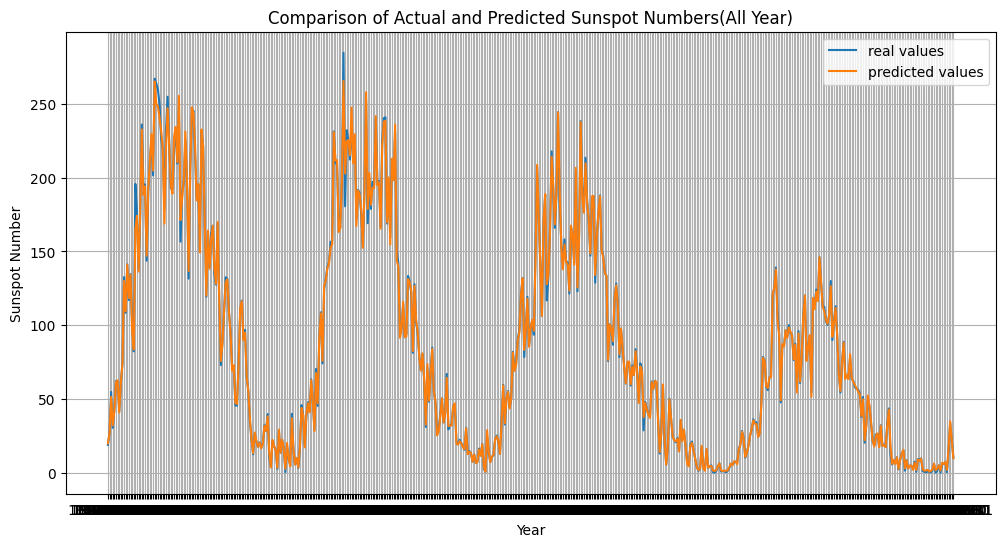

In [60]:
results_df = pd.DataFrame({'real': y_test, 'estimated': y_pred})
results_df = results_df.join(df['Date']) 


results_df = results_df.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(results_df['Date'], results_df['real'], label='real values')
plt.plot(results_df['Date'], results_df['estimated'], label='predicted values')
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.title("Comparison of Actual and Predicted Sunspot Numbers(All Year)")
plt.legend()
plt.grid(True)
plt.show()

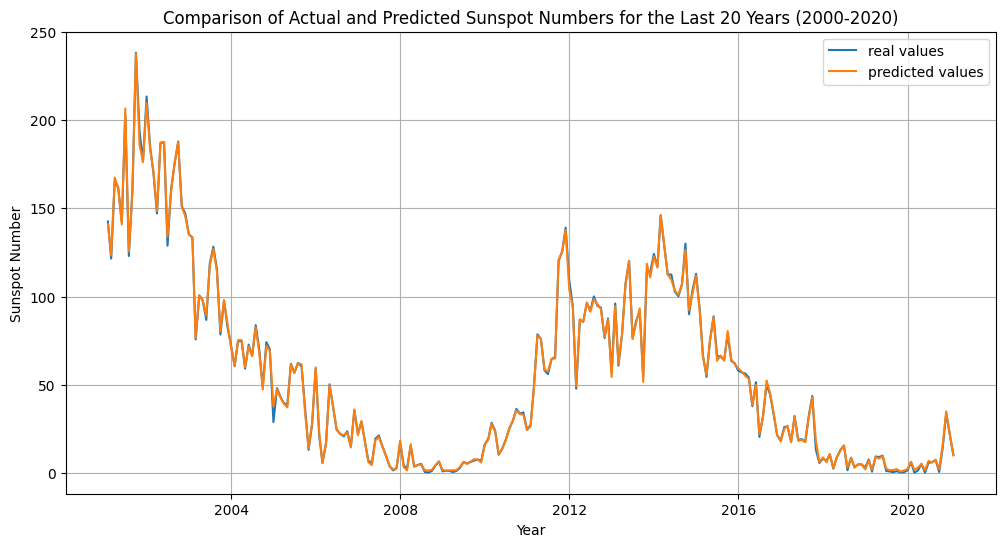

In [61]:
results_df = pd.DataFrame({'real': y_test, 'estimated': y_pred})


results_df = results_df.join(df['Date'])


results_df['Date'] = pd.to_datetime(results_df['Date'])


results_df = results_df.sort_values(by='Date')


end_year = results_df['Date'].dt.year.max()
start_year = end_year - 20
results_last_20_years = results_df[results_df['Date'].dt.year >= start_year].copy()

plt.figure(figsize=(12, 6))
plt.plot(results_last_20_years['Date'], results_last_20_years['real'], label='real values')
plt.plot(results_last_20_years['Date'], results_last_20_years['estimated'], label='predicted values')
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.title(f"Comparison of Actual and Predicted Sunspot Numbers for the Last 20 Years (2000-2020)")
plt.legend()
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

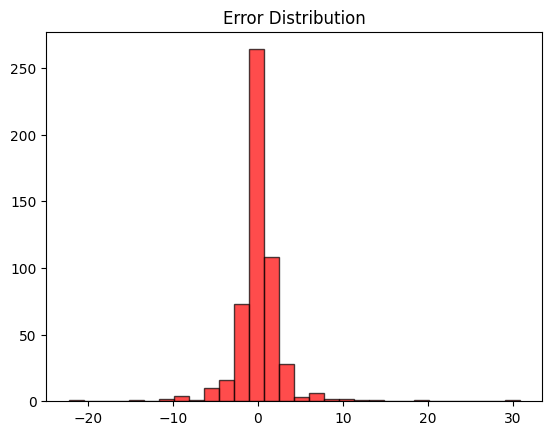

In [62]:
errors = y_test - y_pred
plt.hist(errors,bins=30,color='red',edgecolor='black',alpha=0.7 )
plt.title('Error Distribution')
plt.show

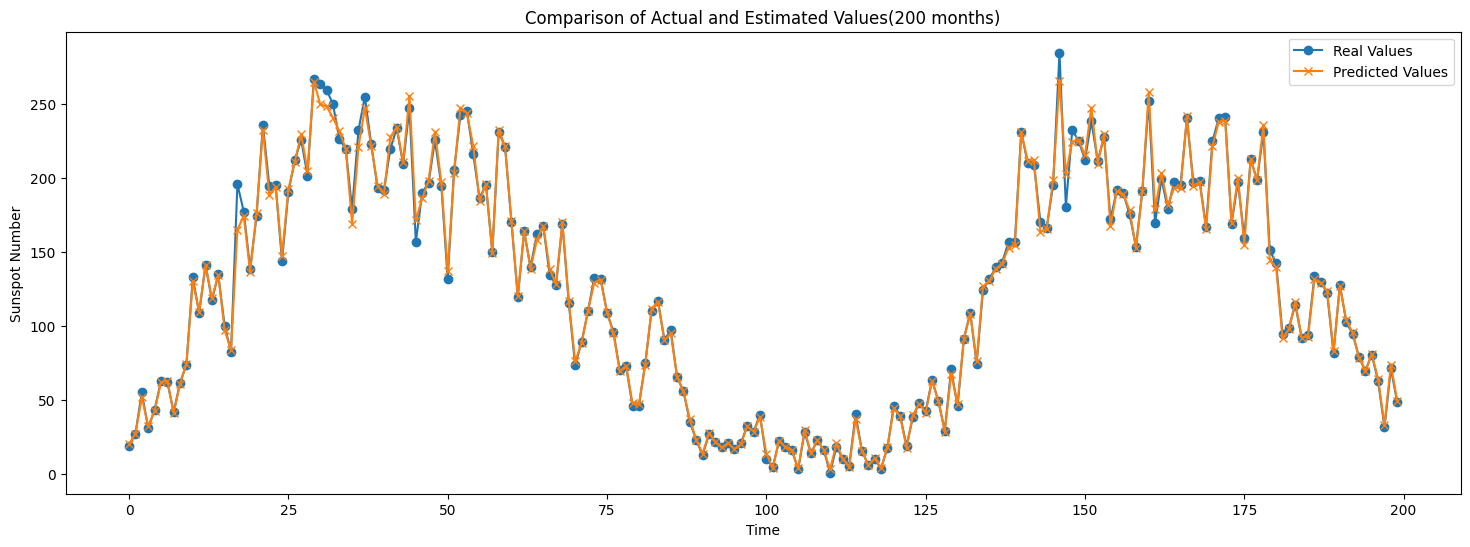

In [63]:
plt.figure(figsize=(18, 6))
plt.plot(range(len(y_test[:200])), y_test[:200], label="Real Values", marker='o')
plt.plot(range(len(y_pred[:200])), y_pred[:200], label="Predicted Values", marker='x')
plt.xlabel("Time")
plt.ylabel("Sunspot Number")
plt.title("Comparison of Actual and Estimated Values(200 months)")
plt.legend()
plt.show()